# Optimización de ingresos

In [1]:
# Librerías para trabajar dataframes y gráficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Booking Dataset – Descripción de los features originales

| Feature                        | Descripción                                                          |
| ------------------------------ | -------------------------------------------------------------------- |
| hotel                          | Tipo de hotel: H1 = Resort Hotel, H2 = City Hotel                    |
| is_canceled                    | Indica si la reserva fue cancelada (1=sí, 0=no)                      |
| lead_time                      | Días entre la reserva y la fecha de llegada                          |
| arrival_date_year              | Año de llegada                                                       |
| arrival_date_month             | Mes de llegada (como texto)                                          |
| arrival_date_week_number       | Número de semana de la fecha de llegada                              |
| arrival_date_day_of_month      | Día del mes de llegada                                               |
| stays_in_weekend_nights        | Noches de fin de semana (sábado–domingo) reservadas o alojadas       |
| stays_in_week_nights           | Noches entre semana (lunes–viernes) reservadas o alojadas            |
| adults                         | Número de adultos                                                    |
| children                       | Número de niños                                                      |
| babies                         | Número de bebés                                                      |
| meal                           | Tipo de comida (SC, BB, HB, FB)                                      |
| country                        | País de origen (código ISO 3155–3)                                   |
| market_segment                 | Segmento de mercado (TA = Agencias de Viaje, TO = Tour Operadores)   |
| distribution_channel           | Canal de distribución (TA = Agencias de Viaje, TO = Tour Operadores) |
| is_repeated_guest              | Indica si el huésped es recurrente (1=sí, 0=no)                      |
| previous_cancellations         | Número de cancelaciones previas                                      |
| previous_bookings_not_canceled | Número de reservas previas no canceladas                             |
| reserved_room_type             | Código de habitación reservada (anonimizado)                         |
| assigned_room_type             | Código de habitación asignada (puede diferir de la reservada)        |
| booking_changes                | Número de cambios realizados en la reserva                           |
| deposit_type                   | Tipo de depósito (No Deposit, Non Refund, Refundable)                |
| agent                          | ID de la agencia de viajes                                           |
| company                        | ID de la empresa o entidad responsable de la reserva                 |
| days_in_waiting_list           | Días que la reserva estuvo en lista de espera                        |
| customer_type                  | Tipo de cliente (Contract, Group, Transient, Transient-party)        |
| adr                            | Tarifa diaria promedio (Average Daily Rate)                          |
| required_car_parking_spaces    | Espacios de estacionamiento requeridos                               |
| total_of_special_requests      | Número total de solicitudes especiales                               |
| reservation_status             | Estado final de la reserva (Canceled, Check-Out, No-Show)            |
| reservation_status_date        | Fecha de la última actualización del estado de la reserva            |


In [2]:
# Importar el csv
df = pd.read_csv('/content/drive/MyDrive/ProyectoBI/hotel_bookings.csv')

## Análisis Exploratorio (EDA) y pre-procesamiento de los datos

In [3]:
# Observamos el tipo de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Valores nulos
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [6]:
# Borra las instancias donde children sea Nan
df.dropna(subset=['children'], inplace=True)

# Borra las instancias donde country es NA
df.dropna(subset=['country'], inplace=True)

In [7]:
# Mostramos la estructura de los features relacionados a la fecha
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [8]:
# Juntamos las columnas y reducimos la dimensionalidad para tener solo una columna de fecha
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Guardamos el formato original para el entrenamiento
df_dates = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
df_dates.dropna(inplace=True)

# Organizamos la nueva columna para dejarla como estaban las columnas relacionadas a la fecha
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('arrival_date')))
df = df.loc[:, cols]

# Borramos las columnas de fecha originales
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

/tmp/ipython-input-1885902683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates.dropna(inplace=True)


Nota: la reducción de la dimensionalidad para las variables de fecha se utilizó unicamente en la etapa de el análisis de los datos para poder tratar de forma más eficiente los datos en la gráficas.

In [9]:
# Cambia el tipo de arrival_date a date time
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Cambia el tipo de is_canceled a booleano
df['is_canceled'] = df['is_canceled'].astype(bool)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

# Cambia el tipo de children a int
df['children'] = df['children'].astype(int)

In [10]:
# Columnas como agent y company suelen trabajarse con ID
df[['agent', 'company']].dropna(subset=['agent', 'company']).head(20)

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
2879,326.0,281.0
2880,334.0,281.0
2881,328.0,281.0
2882,326.0,281.0
2883,334.0,281.0


Para nuestro objetivo de optimización de ingresos, al contemplar los features que teníamos disponibles, decidimos de primeras eliminar algunas columnas que pueden presentar una fuga de datos para el dataset a la hora de entrenar este modelo, en el sentido de que son datos que al momento de hacer predicciones no deberían estar disponibles. En el caso de agent y company, estas features creemos que no ofrecen un valor a la predicción de la variable objetivo debido a la alta cardinalidad que presentan y a que por su naturaleza de trabajarse por ID no muestran información sobre comportamiento o sobre el ADR como tal. Se eliminaron estas columnas

In [11]:
# Eliminamos algunas columnas que consideramos no eran útiles para nuestro análisis y entrenamiento
df.drop(["is_canceled",'booking_changes', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'total_of_special_requests', "assigned_room_type", "agent", "company"], axis=1, inplace=True)

In [12]:
# Verificamos que el tipo de datos sea correcto y no haya valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   lead_time                       118898 non-null  int64         
 2   arrival_date                    118898 non-null  datetime64[ns]
 3   arrival_date_week_number        118898 non-null  int64         
 4   stays_in_weekend_nights         118898 non-null  int64         
 5   stays_in_week_nights            118898 non-null  int64         
 6   adults                          118898 non-null  int64         
 7   children                        118898 non-null  int64         
 8   babies                          118898 non-null  int64         
 9   meal                            118898 non-null  object        
 10  country                         118898 non-null  object      

In [13]:
df.isnull().sum()

,0
hotel,0
lead_time,0
arrival_date,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
meal,0


In [14]:
df.head()

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,342,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
1,Resort Hotel,737,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
2,Resort Hotel,7,2015-07-01,27,0,1,1,0,0,BB,...,Direct,Direct,False,0,0,A,No Deposit,0,Transient,75.0
3,Resort Hotel,13,2015-07-01,27,0,1,1,0,0,BB,...,Corporate,Corporate,False,0,0,A,No Deposit,0,Transient,75.0
4,Resort Hotel,14,2015-07-01,27,0,2,2,0,0,BB,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,98.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   lead_time                       118898 non-null  int64         
 2   arrival_date                    118898 non-null  datetime64[ns]
 3   arrival_date_week_number        118898 non-null  int64         
 4   stays_in_weekend_nights         118898 non-null  int64         
 5   stays_in_week_nights            118898 non-null  int64         
 6   adults                          118898 non-null  int64         
 7   children                        118898 non-null  int64         
 8   babies                          118898 non-null  int64         
 9   meal                            118898 non-null  object        
 10  country                         118898 non-null  object      

In [16]:
# Métricas estadísticas
df.describe(include='number').round(2)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,118898.00,118898.00,118898.00,118898.0,118898.00,118898.0,118898.00,118898.00,118898.00,118898.00,118898.00
mean,104.31,27.17,0.93,2.5,1.86,0.1,0.01,0.09,0.13,2.33,102.00
std,106.90,13.59,1.00,1.9,0.58,0.4,0.10,0.85,1.48,17.63,50.49
min,0.00,1.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-6.38
25%,18.00,16.00,0.00,1.0,2.00,0.0,0.00,0.00,0.00,0.00,70.00
50%,69.00,28.00,1.00,2.0,2.00,0.0,0.00,0.00,0.00,0.00,95.00
75%,161.00,38.00,2.00,3.0,2.00,0.0,0.00,0.00,0.00,0.00,126.00
max,737.00,53.00,16.00,41.0,55.00,10.0,10.00,26.00,72.00,391.00,5400.00


In [17]:
# One hot encoder para las variables categóricas (menos país)
dummy = df.drop(columns=['country'])

dummy=pd.get_dummies(dummy, dtype=int)
dummy.head()

,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015-07-01,27,0,0,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
1,737,2015-07-01,27,0,0,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2015-07-01,27,0,1,1,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
3,13,2015-07-01,27,0,1,1,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
4,14,2015-07-01,27,0,2,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0


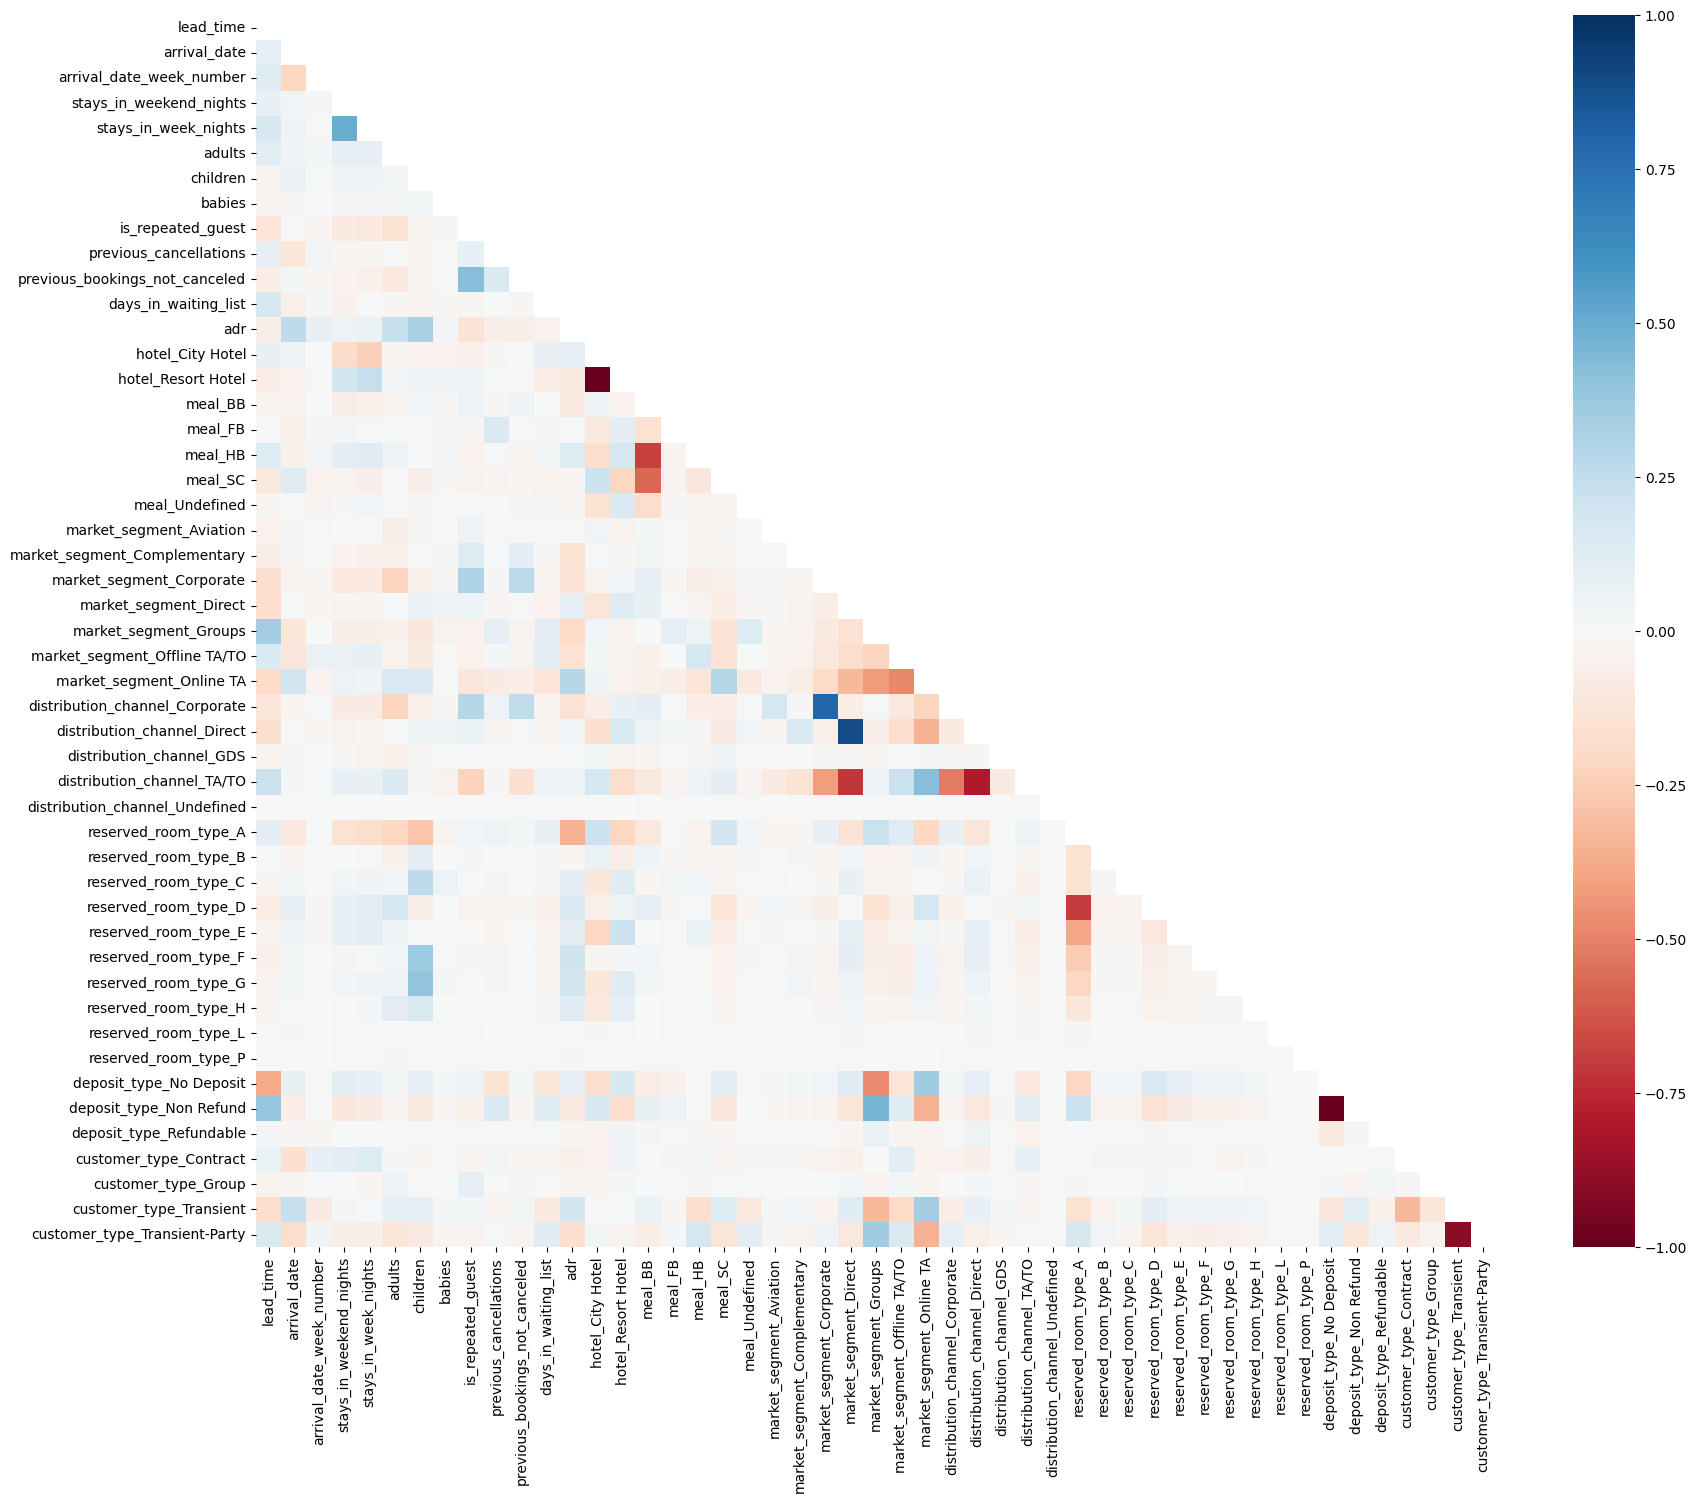

In [18]:
# Matriz de correlación
corr=dummy.corr()
fig, axs=plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot=False, ax=axs, fmt=".2f", vmin="-1", vmax="1", mask=np.triu(corr), cmap="RdBu")
plt.grid(False)
plt.show()

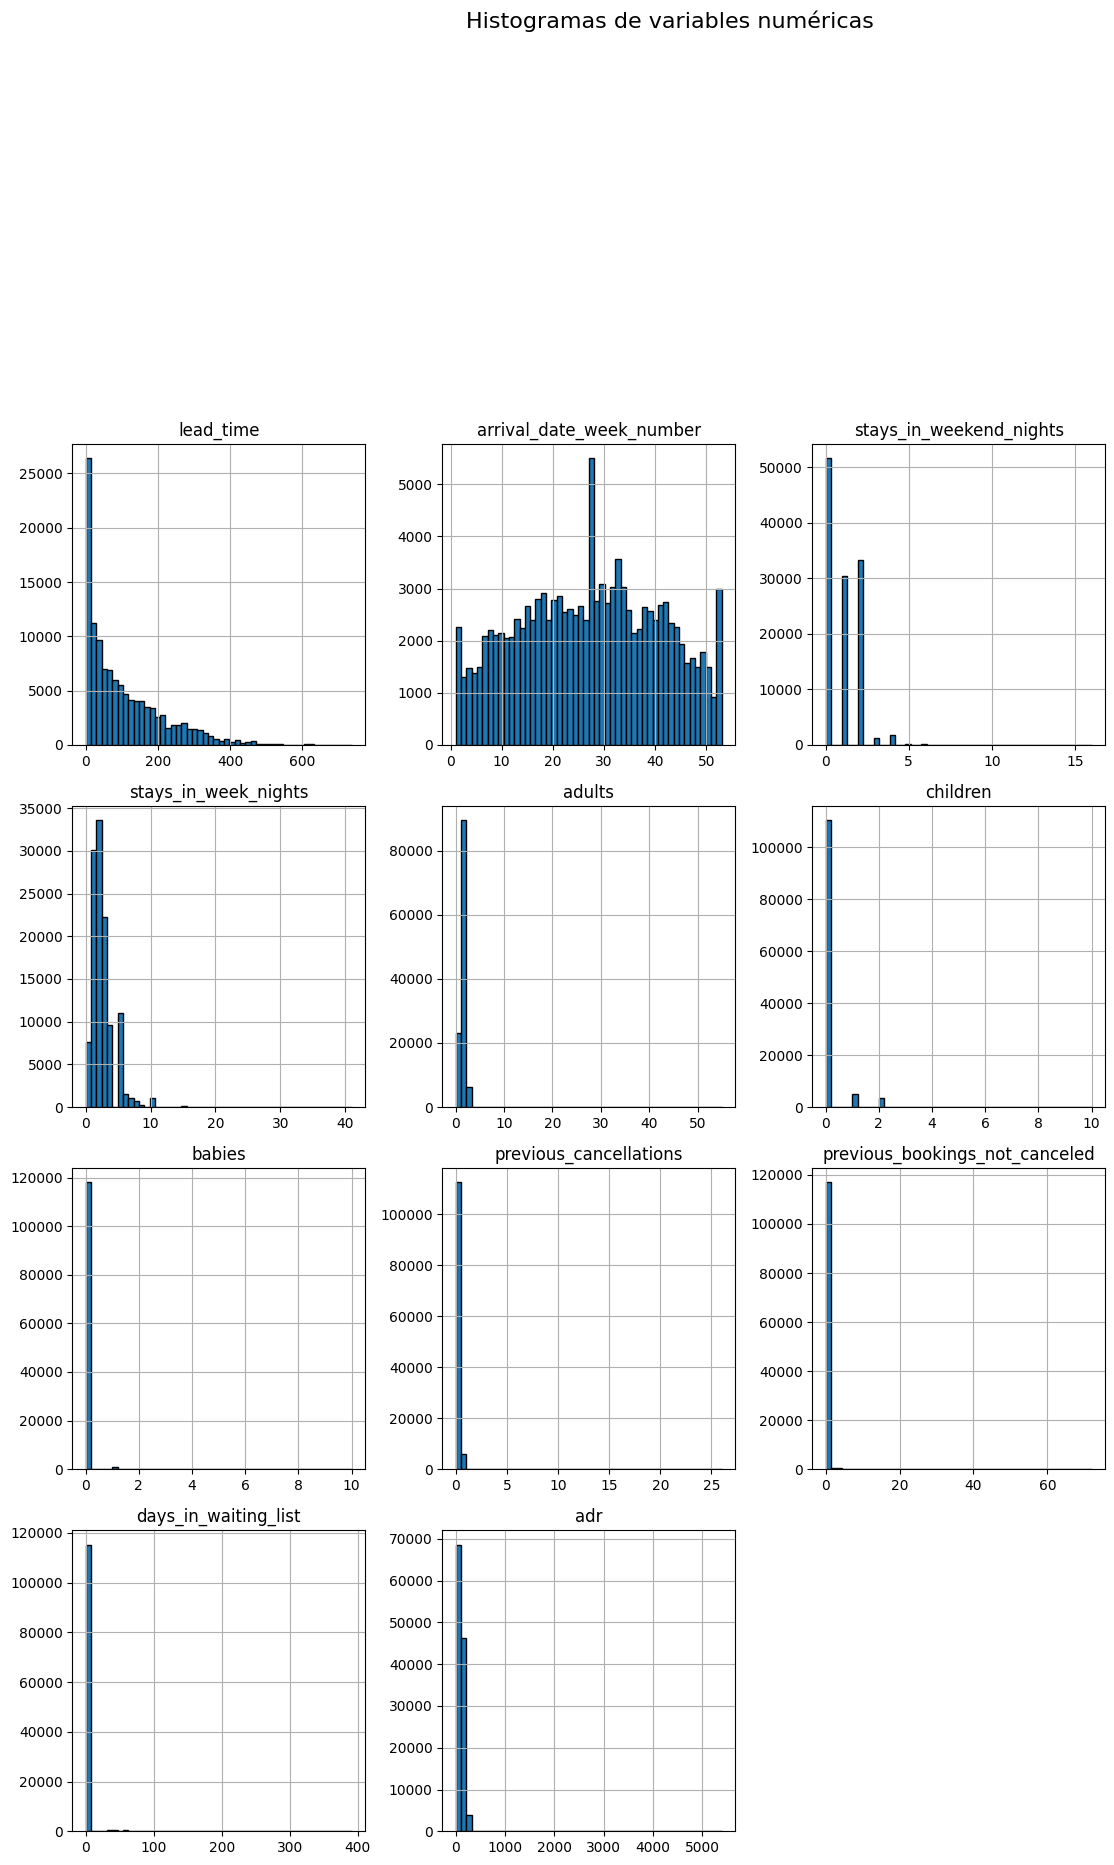

In [19]:
# Matriz de histogramas
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.8, 0.8])
plt.show()

## Tratamiento de valores atípicos y anomalías

Durante el EDA se encontraron datos con valores atípicos y también anómalos.
Por ejemplo, al hacer gráficas de ADR (Tarifa diaria promedio), pudimos observar que el eje donde se graficaba este feature mostraba ticks de hasta 6000, por lo que nos resultaba extraño que aparecieran datos cerca de este número. Se hizo una consulta para verificar esto y obtuvimos que había una instancia con un valor de ADR de 5400, junto con algunos datos que únicamente llegaban a 500 de ADR. Con esto en mente, creemos que lo más probable es que existió un error al ingresar los datos y el valor real debería ser cercano a los 500 de ADR. De cualquier modo, decidimos borrar esta instancia.


In [20]:
# Consulta la instancia donde adr es mayor a 000
df[df['adr'] > 500]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
15083,Resort Hotel,1,2015-07-15,29,0,1,2,0,0,BB,...,Corporate,Corporate,True,0,1,A,No Deposit,0,Transient,508.0
48515,City Hotel,35,2016-03-25,13,0,1,2,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,Non Refund,0,Transient,5400.0
111403,City Hotel,0,2017-05-09,19,0,1,1,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Transient,510.0


In [21]:
df[df['adr'] == 5400]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
48515,City Hotel,35,2016-03-25,13,0,1,2,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,Non Refund,0,Transient,5400.0


In [22]:
# Borra la instancia donde adr es 5400
df.drop(df[df['adr'] == 5400].index, inplace=True)

Al ejecutar la función describe() se observó que el valor máximo de lead_time era considerablemente alto en comparación con el promedio y el tercer cuartil. Para investigar esto, se realizó una consulta específica para identificar valores iguales o superiores a 500 días, y efectivamente se encontraron varias instancias, incluso algunas cercanas a 600 días. Debido a esto, concluimos que no es necesario eliminar estas observaciones, ya que parecen ser valores atípicos pero posibles dentro del comportamiento real de las reservas.

In [23]:
# Consulta la instancia donde lead time es mayor a 500
df[df['lead_time'] > 500]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
1,Resort Hotel,737,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.00
4182,Resort Hotel,709,2016-02-25,9,8,20,2,0,0,HB,...,Direct,Direct,False,0,0,E,No Deposit,0,Transient,68.00
8395,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,69.71
8397,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,E,No Deposit,0,Transient-Party,87.00
8399,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,E,No Deposit,0,Transient-Party,87.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119100,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67
119102,City Hotel,518,2017-08-26,34,2,1,1,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,0.00
119107,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67
119109,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67


Para un segundo caso, ocurrió que existía un valor de ADR que era negativo, lo cual en la teoría es imposible debido a que el ADR es una métrica que se calcula dividiendo los ingresos totales por habitaciones entre el número de habitaciones vendidas (variables que nunca deberían ser negativas). Se procedió a borrar la instancia del dataset.

In [24]:
# Consulta para ADR menor a 0 (Negativo)
df[df['adr'] < 0]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
14969,Resort Hotel,195,2017-03-05,10,4,6,2,0,0,BB,...,Groups,Direct,True,0,2,A,No Deposit,0,Transient-Party,-6.38


In [25]:
# Borra las instancia de ADR negativa
df.drop(df[df['adr'] < 0].index, inplace=True)

Así también ocurria que existián instancias donde ADR era 0, se podría justificar estos casos con la razón de que eran cortesía, sin embargo, no podemos asegurar esto así que decidimos borrar estos datos.

In [26]:
# Consulta para ADR igual a 0
df[df['adr'] == 0]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,342,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
1,Resort Hotel,737,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
125,Resort Hotel,32,2015-07-04,27,0,1,4,0,0,FB,...,Complementary,Direct,False,0,0,H,No Deposit,0,Transient,0.0
167,Resort Hotel,111,2015-07-06,28,0,0,2,0,0,BB,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,0.0
168,Resort Hotel,0,2015-07-06,28,0,0,1,0,0,BB,...,Direct,Direct,False,0,0,E,No Deposit,0,Transient,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,78,2017-08-23,34,0,0,1,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,0.0
118762,City Hotel,1,2017-08-24,34,0,1,2,1,0,BB,...,Complementary,Direct,False,0,0,A,No Deposit,0,Transient,0.0
118963,City Hotel,1,2017-08-27,35,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,A,No Deposit,0,Transient,0.0
119102,City Hotel,518,2017-08-26,34,2,1,1,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,0.0


In [27]:
# Borra las instancia de ADR igual a 0
df.drop(df[df['adr'] == 0].index, inplace=True)

También se consideraron los casos donde los días de estancia entre semana y fin de semana fueran 0 para los dos casos. Se borraron estas instancias.

In [28]:
# Consulta instancias donde stays_in_weekend_nights y stays_in_week_nights son 0
df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr


In [29]:
# Borra estas instancias
df.drop(df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)].index, inplace=True)

Otro dato que llamó la atención fue el máximo de 55 personas (adultas) para una sola reservación, por lo que procedimos a hacer una rápida consulta de los datos para verificar que no fuera un valor ficticio. Al hacer la consulta, pudimos observar que existen algunas instancias donde la reservación se realizó para más de 20 personas (12 instancias que cumplen con esto), sin embargo, puede justificarse debido al customer_type que nos indica el tipo de reservación que se realizó para los clientes, en este caso la reservación fue grupal por lo que tiene sentido que haya ese número de huespedes en los datos.

In [30]:
# Consulta instancias para adultos mayor a 10
df[df['adults'] > 10]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr


Así también, se consultaron las instancias para valores de children y babies de más de 5 (una consulta para cada feature). En estos casos llama la atención que los valores máximos son de 10 para ambos, al hacer la consulta encontramos los siguientes casos:

- Una instancia muestra a dos adultos hospedados con 10 niños bajo tipo de reserva como "contrato". Es interesante ver que aún siendo una reservación bajo contrato, la siguiente instancia más parecida a esta no llega ni a los 4 niños hospedados. Con esto en mente, nosotros decidimos eliminar la instancia ya que consideramos que se trata de un error en los datos.
- Una instancia muestra a dos adultos hospedados con 10 bebés bajo tipo de reserva como "transient", es decir, una reservación única. En este casi, se hizo una consulta para reservaciones con 3 o más bebés y se encontró que ni siquiera hay reservaciones para 3 bebés, por lo que consideramos que este valor también es un error y lo eliminamos del dataset.
- Una instancia muestra a un adulto hospedado con 9 bebés bajo tipo de reserva como "transient-party", es decir, un conjunto de reservas o un grupo pequeño. De igual manera todo parece indicar que es un valor erróneo, se eliminó la instancia.

In [31]:
# Consulta instancias para niños mayor a 3, ordena por mayor
df[df['children'] >= 3].sort_values('children', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
328,Resort Hotel,55,2015-07-12,29,4,10,2,10,0,BB,...,Offline TA/TO,TA/TO,False,0,0,D,No Deposit,0,Contract,133.16
6748,Resort Hotel,266,2016-06-28,27,2,8,2,3,0,BB,...,Online TA,TA/TO,False,0,0,H,No Deposit,0,Transient,151.80
7666,Resort Hotel,70,2016-08-19,34,2,3,1,3,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,200.70
16360,Resort Hotel,272,2015-08-17,34,3,6,2,3,0,BB,...,Online TA,TA/TO,False,0,0,G,No Deposit,0,Transient,199.00
18745,Resort Hotel,0,2015-11-28,48,0,1,2,3,0,BB,...,Direct,Direct,False,0,0,G,No Deposit,0,Transient,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118375,City Hotel,139,2017-08-15,33,0,4,2,3,0,HB,...,Direct,Direct,False,0,0,G,No Deposit,0,Transient,300.00
118557,City Hotel,6,2017-08-21,34,1,0,2,3,0,BB,...,Online TA,TA/TO,False,0,0,G,No Deposit,0,Transient,264.44
118852,City Hotel,215,2017-08-25,34,0,1,2,3,0,BB,...,Direct,Direct,False,0,0,G,No Deposit,0,Transient,245.00
119054,City Hotel,8,2017-08-26,34,2,1,2,3,0,BB,...,Online TA,TA/TO,False,0,0,G,No Deposit,0,Transient,253.51


In [32]:
# Consulta la instancia donde children es igual a 10
df[df['children'] == 10]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
328,Resort Hotel,55,2015-07-12,29,4,10,2,10,0,BB,...,Offline TA/TO,TA/TO,False,0,0,D,No Deposit,0,Contract,133.16


In [33]:
# Borra la instancia donde children es igual a 10
df.drop(df[df['children'] == 10].index, inplace=True)

In [34]:
# Consulta las instancias donde babies es mayor a 3
df[df['babies'] >= 3]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
46619,City Hotel,37,2016-01-12,3,0,2,2,0,10,BB,...,Online TA,TA/TO,False,0,0,D,No Deposit,0,Transient,84.45
78656,City Hotel,11,2015-10-11,42,2,1,1,0,9,BB,...,Corporate,Corporate,False,0,0,A,No Deposit,0,Transient-Party,95.00


In [35]:
# Borra las intancias donde babies es mayor a 3
df.drop(df[df['babies'] >= 3].index, inplace=True)

In [36]:
# Consulta instancias donde no hay adultos pero hay niños o bebes
df[((df['adults'] == 0) & (df['children'] > 0)) | ((df['adults'] == 0) & (df['babies'] > 0))]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
40984,City Hotel,1,2015-08-10,33,1,1,0,3,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient-Party,9.00
41048,City Hotel,104,2015-08-11,33,0,3,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient-Party,6.00
41446,City Hotel,3,2015-08-16,34,2,0,0,2,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient-Party,6.00
45158,City Hotel,48,2015-10-19,43,1,3,0,2,0,BB,...,Offline TA/TO,TA/TO,False,0,0,B,No Deposit,0,Transient-Party,6.00
46132,City Hotel,6,2015-12-13,51,1,0,0,3,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient-Party,104.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,296,2017-07-27,30,1,3,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,98.85
117274,City Hotel,276,2017-07-30,31,2,1,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,93.64
117303,City Hotel,291,2017-07-29,30,2,2,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,98.85
117453,City Hotel,159,2017-07-31,31,1,3,0,2,0,SC,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,121.88


In [37]:
# Se filtran esas instancias (además de reservaciones sin adultos en general)
df = df[(df['adults'] > 0)]

Más adelante, vimos que para days in waiting list, ocurre algo parecido en el sentido que aparece un valor muy grande para el valor máximo cuando su tercer cuartil es 0. En este caso se hizo una consulta simple para ver si había valores donde days in waiting list eran mayor a 0. Después, al encontrar valores mayores a 0 decidimos hacer una pequeña gráfica para ver un histograma para los valores que era mayores a 0. Con esto pudimos verificar que no hubiera datos anómalos que indicaran un valor erróneo en los datos (aunque si hubo outliers, los cuales nos pareció pertinente dejar).

In [38]:
# Consulta instancias mayores para waiting list mayores a 0
df[df['days_in_waiting_list'] > 0].sort_values('days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
59408,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.00
59411,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.00
59412,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.00
59421,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.00
59430,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54523,City Hotel,61,2016-07-18,30,3,8,3,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,E,No Deposit,1,Transient,139.34
54525,City Hotel,61,2016-07-18,30,3,8,2,0,1,BB,...,Offline TA/TO,TA/TO,False,0,0,E,No Deposit,1,Transient,139.34
31564,Resort Hotel,45,2016-12-30,53,0,2,2,0,0,HB,...,Groups,Direct,False,0,0,D,No Deposit,1,Transient-Party,295.00
31571,Resort Hotel,45,2016-12-30,53,0,2,3,1,0,HB,...,Groups,Direct,False,0,0,C,No Deposit,1,Transient-Party,367.00


In [39]:
# Count para valores mayores a 0 en waiting list
df[df['days_in_waiting_list'] > 0]['days_in_waiting_list'].count()

np.int64(3666)

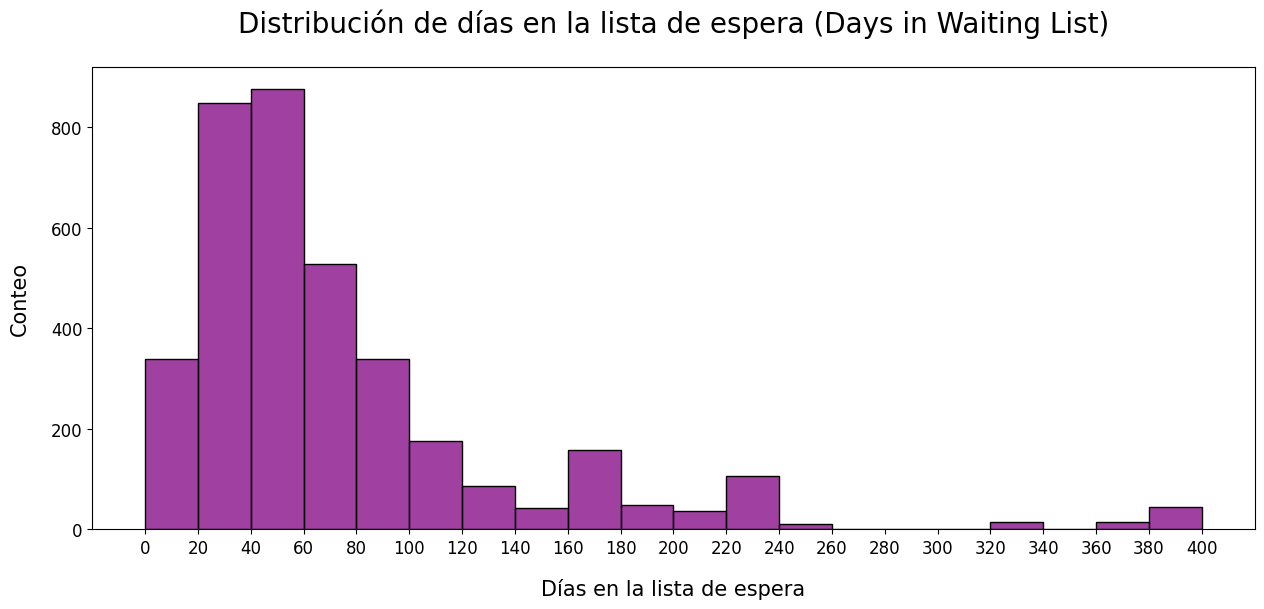

In [40]:
# Histograma para días en lista de espera
data = df[df['days_in_waiting_list'] > 0]['days_in_waiting_list']

bins = np.arange(0, data.max() + 20, 20)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'

)

plt.title('Distribución de días en la lista de espera (Days in Waiting List)', fontsize=20, pad=25)
plt.xlabel('Días en la lista de espera', fontsize=15, labelpad=15)
plt.ylabel('Conteo', fontsize=15, labelpad=15)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Algo similar pasa con previous cancellations y previous bookings not canceled, donde el máximo valor es muy alto pero hasta el tercer cuartil el promedio es de cero. Para esto se realizaron consultas para cada feature y más adelante se realizó un histograma para cada uno con valores mayor a 0 (es decir la minoría de los datos) para asegurarnos de que no se trataba de un error en los datos y solo eran outliers. En este caso identificamos valores atípicos pero que todo indica que pueden ser reales, estos valores se quedaron dentro del dataset final.

In [41]:
# Consulta instancias para cancelaciones previas mayores a 10
df[df['previous_cancellations'] >= 10].sort_values('previous_cancellations', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
14779,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.0
14780,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.0
14781,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.0
14782,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.0
14783,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80058,City Hotel,190,2016-04-09,15,1,1,2,0,0,BB,...,Groups,TA/TO,False,11,25,A,No Deposit,31,Transient-Party,70.0
80059,City Hotel,190,2016-04-09,15,1,1,2,0,0,BB,...,Groups,TA/TO,False,11,25,A,No Deposit,31,Transient-Party,70.0
80060,City Hotel,190,2016-04-09,15,1,1,2,0,0,BB,...,Groups,TA/TO,False,11,25,A,No Deposit,31,Transient-Party,70.0
80061,City Hotel,190,2016-04-09,15,1,1,2,0,0,BB,...,Groups,TA/TO,False,11,25,A,No Deposit,31,Transient-Party,70.0


Para el histograma de cancelaciones previas se excluyó el 1 y 0 para visualizar de mejor manera la distribución de los datos, ya que estos últimos constituían la mayoría de las instancias y con el histograma no se podía visualizar de buena manera los demás casos.

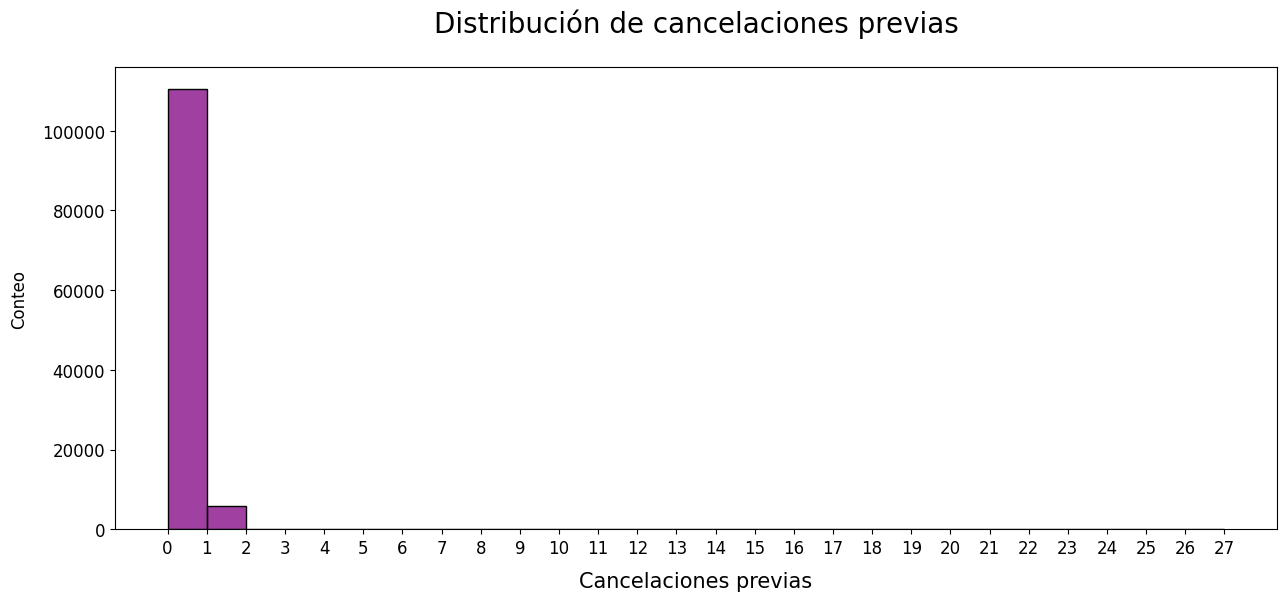

In [42]:
# Histograma para cancelaciones previas (todos los valores)
data = df['previous_cancellations']

bins = np.arange(0, data.max() + 2, 1)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de cancelaciones previas', fontsize=20, pad=25)
plt.xlabel('Cancelaciones previas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

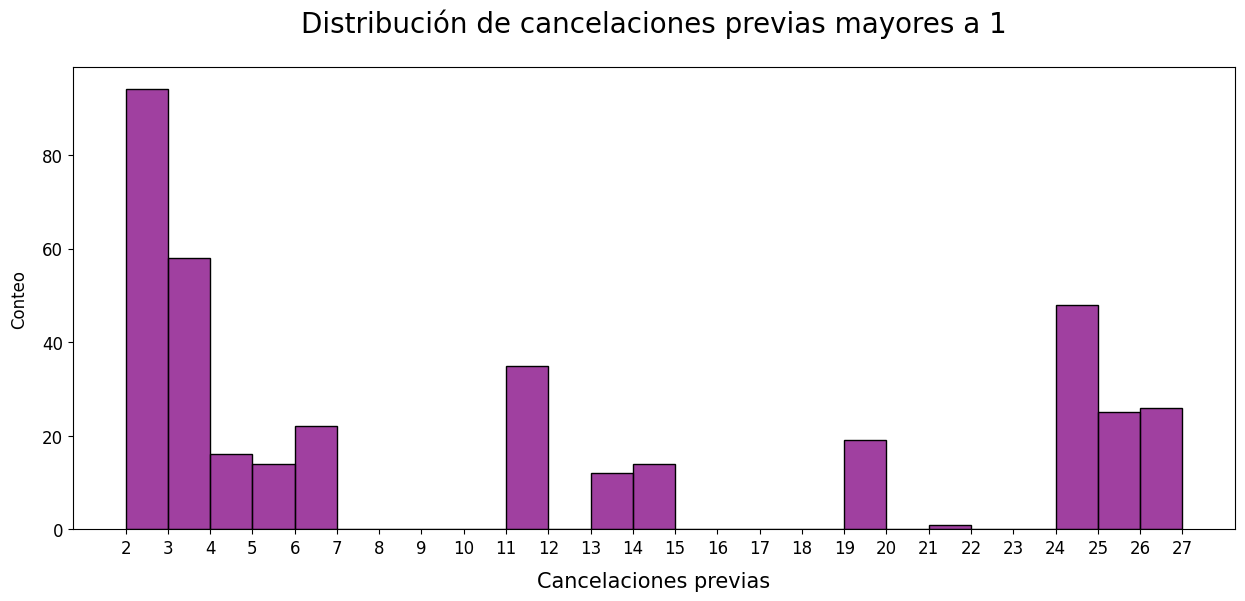

In [43]:
# Histograma para cancelaciones previas mayores a 1
data = df[df['previous_cancellations'] > 1]['previous_cancellations']

bins = np.arange(2, data.max() + 2, 1)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de cancelaciones previas mayores a 1', fontsize=20, pad=25)
plt.xlabel('Cancelaciones previas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [44]:
# Consulta instancias para resevaciones previas no canceladas mayores a 10
df[df['previous_bookings_not_canceled'] >= 10].sort_values('previous_bookings_not_canceled', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
76731,City Hotel,0,2017-08-22,34,0,1,1,0,0,BB,...,Corporate,Corporate,True,6,72,A,No Deposit,0,Transient,67.0
76730,City Hotel,4,2017-07-23,30,2,1,1,0,0,BB,...,Corporate,Corporate,True,6,71,A,No Deposit,0,Transient,65.0
76729,City Hotel,4,2017-07-16,29,1,0,1,0,0,BB,...,Corporate,Corporate,True,6,70,A,No Deposit,0,Transient,65.0
76728,City Hotel,5,2017-07-11,28,0,2,1,0,0,BB,...,Corporate,Corporate,True,6,69,A,No Deposit,0,Transient,65.0
76727,City Hotel,5,2017-07-04,27,0,3,1,0,0,BB,...,Corporate,Corporate,True,6,68,A,No Deposit,0,Transient,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,City Hotel,54,2017-03-26,13,1,0,1,0,0,BB,...,Corporate,Corporate,True,1,10,A,No Deposit,0,Transient,67.0
94227,City Hotel,3,2017-01-23,4,1,0,1,0,0,BB,...,Corporate,Corporate,True,0,10,A,No Deposit,0,Transient,65.0
92963,City Hotel,54,2017-03-26,13,1,0,1,0,0,BB,...,Corporate,Corporate,True,1,10,A,No Deposit,0,Transient,67.0
13959,Resort Hotel,3,2017-03-02,9,0,1,1,0,0,BB,...,Corporate,Corporate,False,2,10,A,No Deposit,0,Transient,35.0


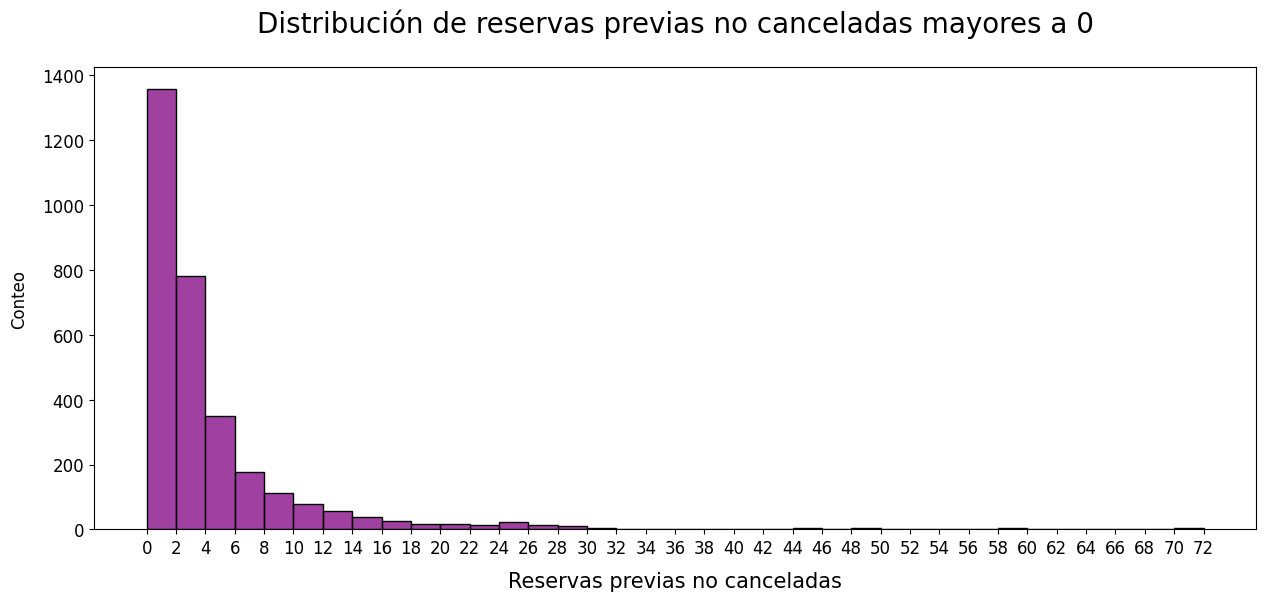

In [45]:
# Histograma para resevaciones previas no canceladas mayores a 0
data = df[df['previous_bookings_not_canceled'] > 0]['previous_bookings_not_canceled']

bins = np.arange(0, data.max() + 2, 2)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de reservas previas no canceladas mayores a 0', fontsize=20, pad=25)
plt.xlabel('Reservas previas no canceladas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [46]:
# Métricas estadísticas
df.describe(include='number').round(2)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00,116707.00
mean,105.35,27.14,0.94,2.52,1.87,0.10,0.01,0.09,0.12,2.35,103.70
std,106.97,13.56,0.99,1.88,0.47,0.39,0.09,0.85,1.43,17.73,46.65
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.26
25%,19.00,16.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,71.00
50%,71.00,27.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,95.00
75%,162.00,38.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,126.00
max,709.00,53.00,16.00,40.00,4.00,3.00,2.00,26.00,72.00,391.00,510.00


## Gráficas para analizar la relación entre los features

In [47]:
# Lista con el orden de los meses a mostrar en las gráficas
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

/tmp/ipython-input-3060138727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


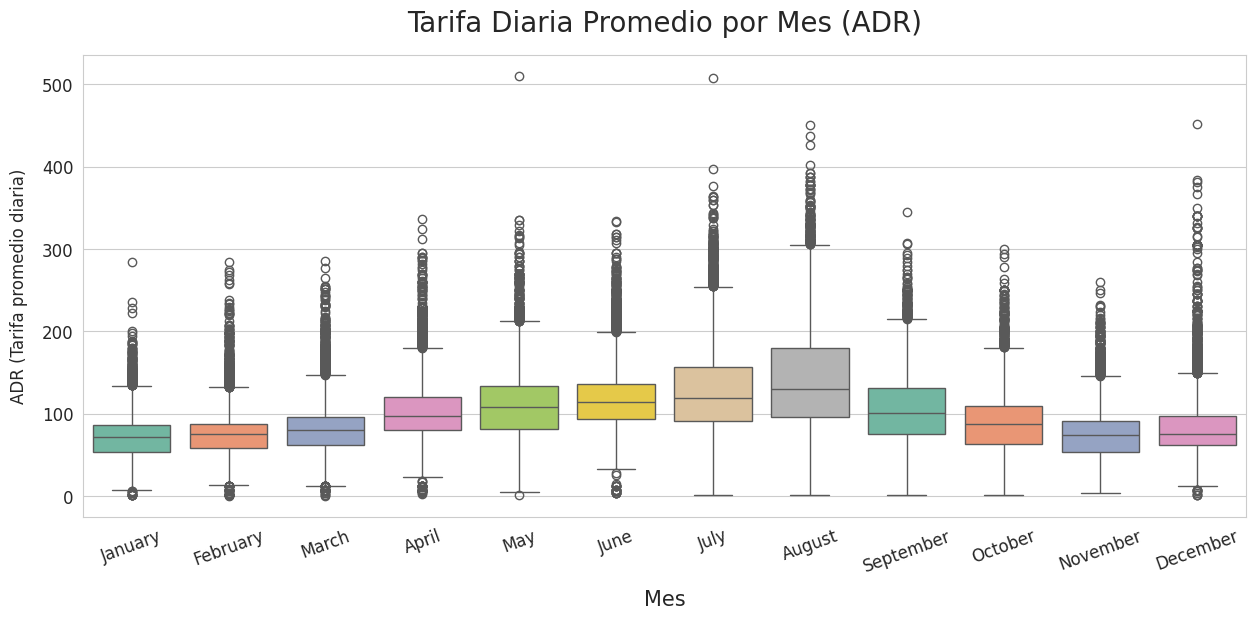

In [48]:
#@title Gráfica Tarifa diaria promedio por mes(ADR)
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['arrival_date'].dt.month_name(),
    y=df['adr'],
    order=months,
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Mes (ADR)', fontsize=20, pad=17)
plt.xlabel('Mes', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/tmp/ipython-input-972889069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


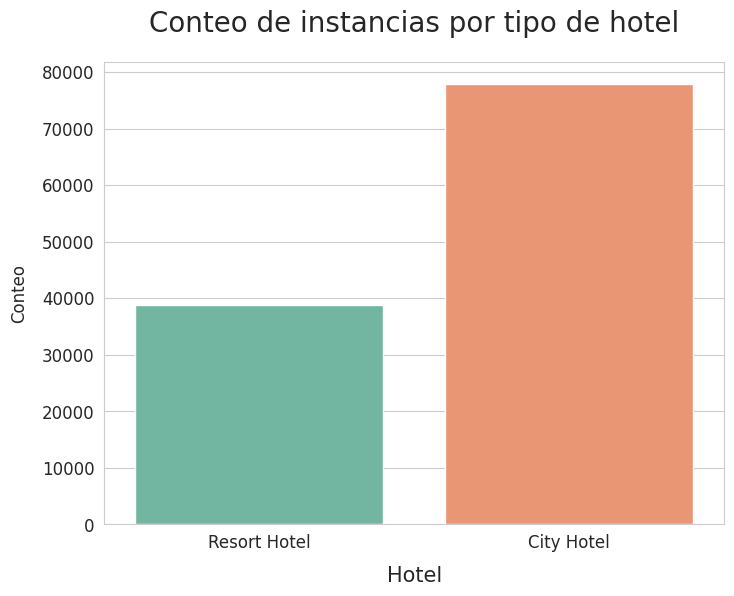

In [49]:
#@title Gráfica conteto por tipo de hotel
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['hotel'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de hotel', fontsize=20, pad=22)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/tmp/ipython-input-697415929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


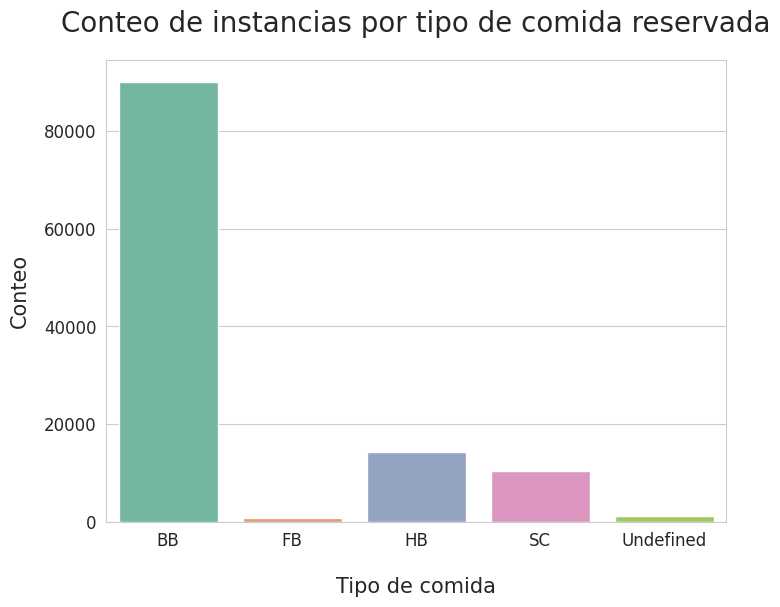

In [50]:
#@title Gráfica para conteo por tipo de comida reservado
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['meal'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de comida reservada', fontsize=20, pad=20)
plt.xlabel('Tipo de comida', fontsize=15, labelpad=20)
plt.ylabel('Conteo', fontsize=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/tmp/ipython-input-2639145588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


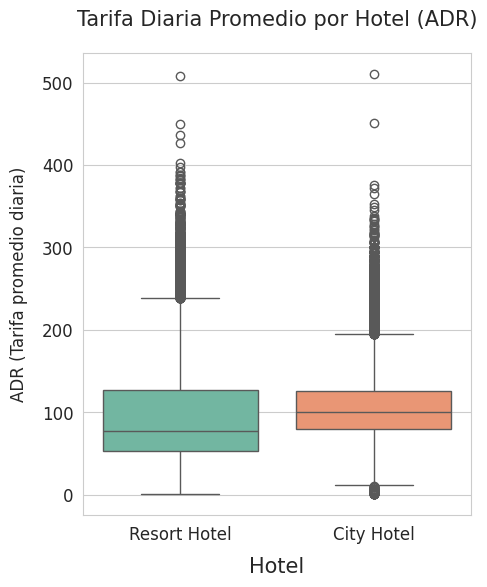

In [51]:
#@title Gráfica box para tarifa diaria promedio (ADR) por tipo de hotel
plt.figure(figsize=(5, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['hotel'],
    y=df['adr'],
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Hotel (ADR)', fontsize=15, pad=20)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

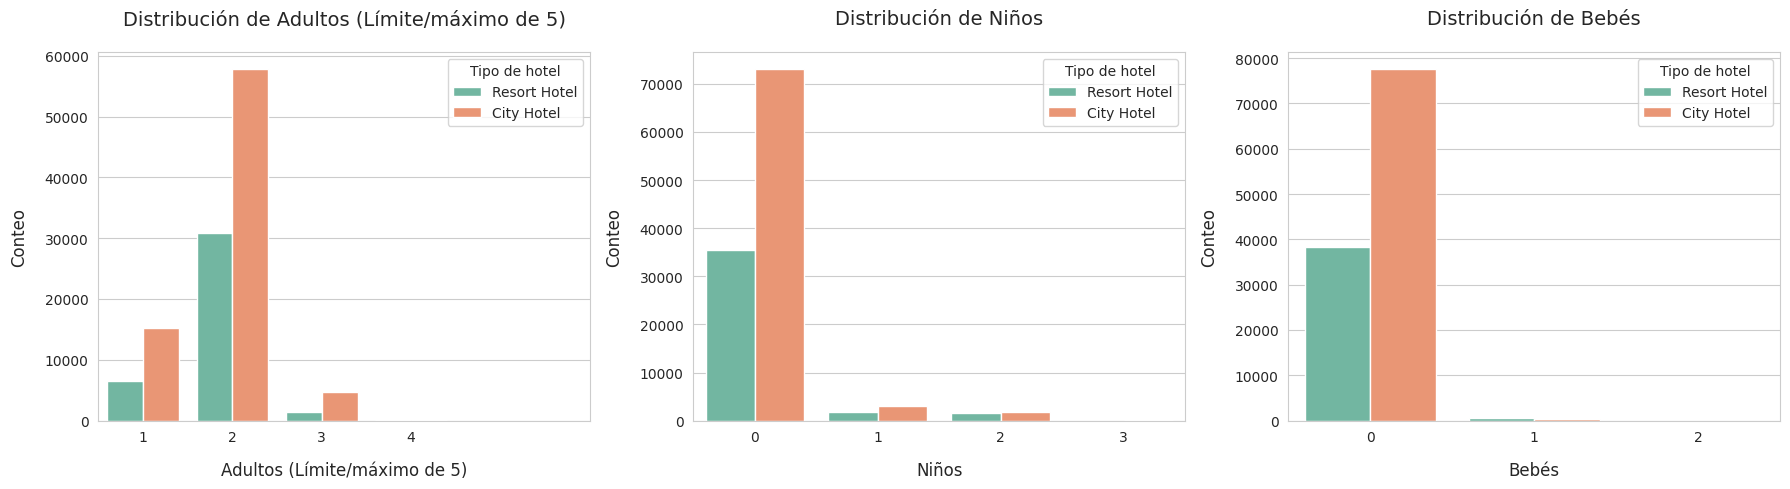

In [52]:
#@title Gráfica distribución de adultos, niños y bebés (Máximo 5)
features = ["adults", "children", "babies"]
titles = {
    "adults": "Adultos (Límite/máximo de 5)",
    "children": "Niños",
    "babies": "Bebés"
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style("whitegrid")

for ax, feature in zip(axes, features):

    # Límite para adultos
    if feature == "adults":
        data = df[df["adults"] <= 5]
        max_val = 5
    else:
        data = df
        max_val = df[feature].max()

    sns.countplot(
        data=data,
        x=feature,
        hue="hotel",
        palette="Set2",
        ax=ax
    )

    ax.set_title(f"Distribución de {titles[feature]}", fontsize=14, pad=20)
    ax.set_xticks(range(0, max_val + 1))
    ax.set_xlabel(titles[feature], fontsize=12, labelpad=12)
    ax.set_ylabel("Conteo", fontsize=12, labelpad=12)

    leg = ax.get_legend()
    leg.set_title("Tipo de hotel")

plt.tight_layout()
plt.show()


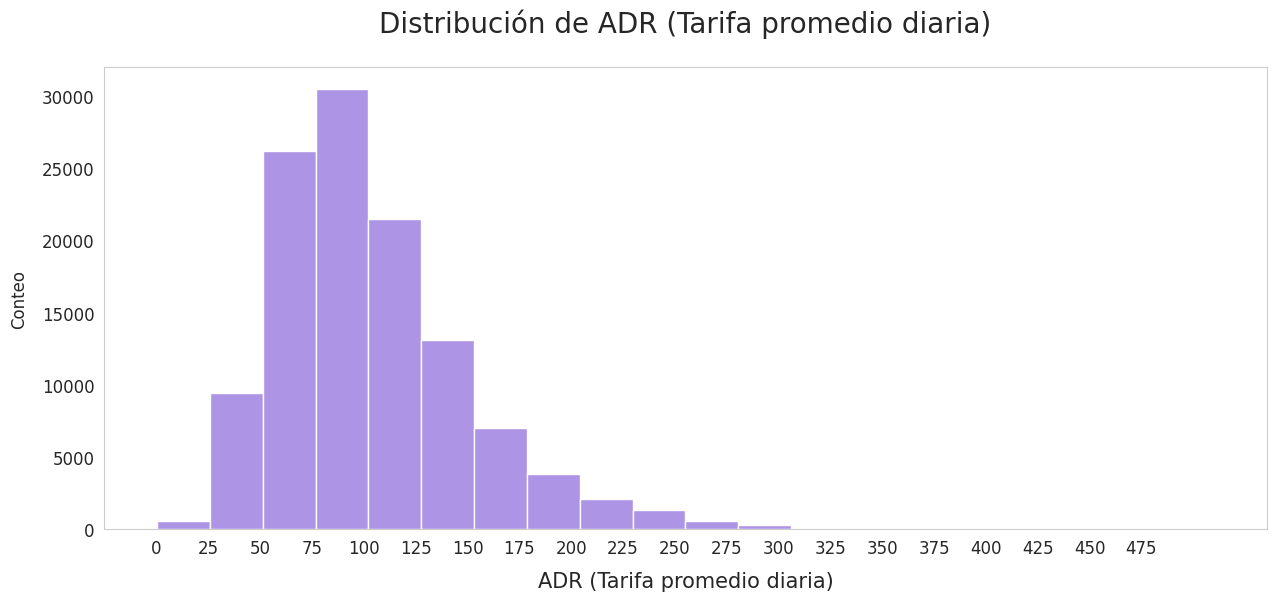

In [53]:
#@title Histograma ADR
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='adr',
    bins=20,
    color="mediumpurple"
)

plt.title('Distribución de ADR (Tarifa promedio diaria)', fontsize=20, pad=25)
plt.xlabel('ADR (Tarifa promedio diaria)', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(range(0, 500, 25), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

plt.show()


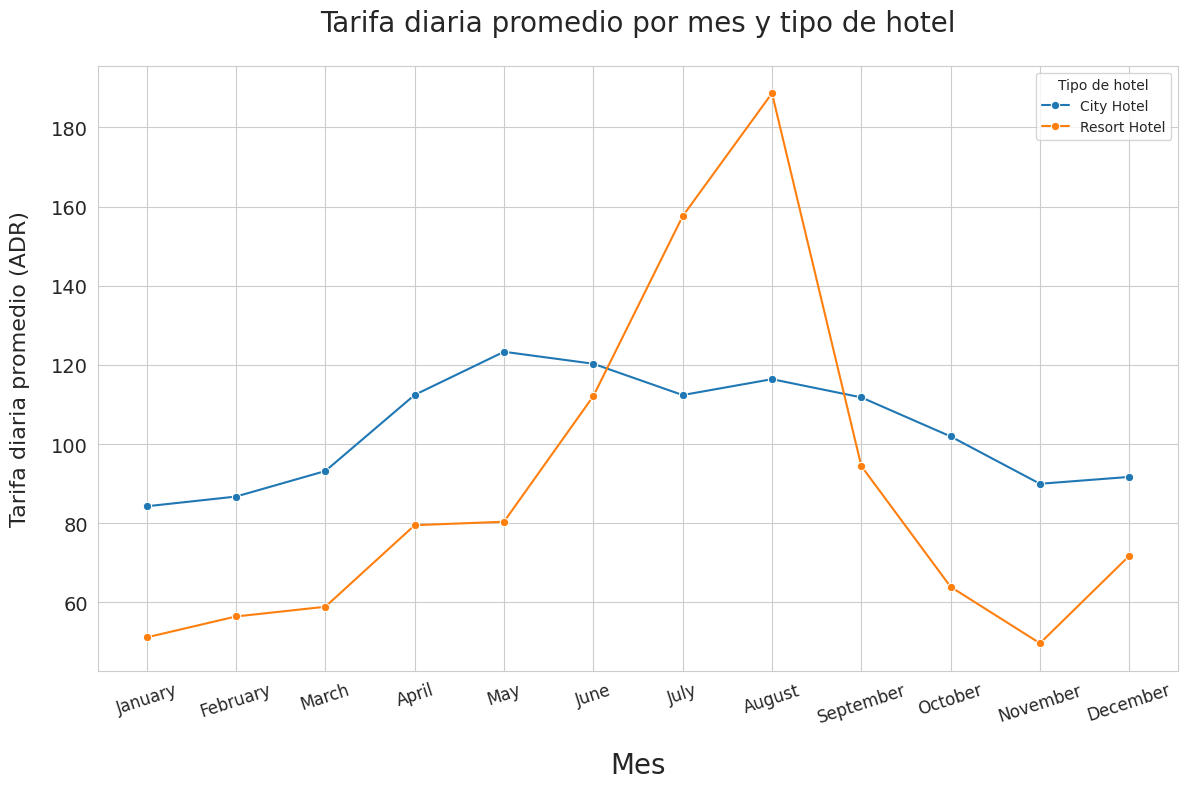

In [54]:
#@title Tarifa diaria promedio por mes y tipo de hotel
line_data = df.groupby([
    df['arrival_date'].dt.month_name(),
    'hotel'
])['adr'].mean().reset_index()

line_data['month'] = pd.Categorical(
    line_data['arrival_date'],
    categories=months,
    ordered=True
)

line_data = line_data.sort_values('month')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.lineplot(
    line_data,
    x='month',
    y='adr',
    hue='hotel',
    marker='o',
    ax=ax1
)

ax1.set_title("Tarifa diaria promedio por mes y tipo de hotel", fontsize=20, pad=25)
ax1.set_xlabel("Mes", fontsize=20, labelpad=18)
ax1.set_ylabel("Tarifa diaria promedio (ADR)", fontsize=16, labelpad=15)
ax1.tick_params(axis='x', rotation=18, labelsize=12)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title="Tipo de hotel")

plt.tight_layout()
plt.show()


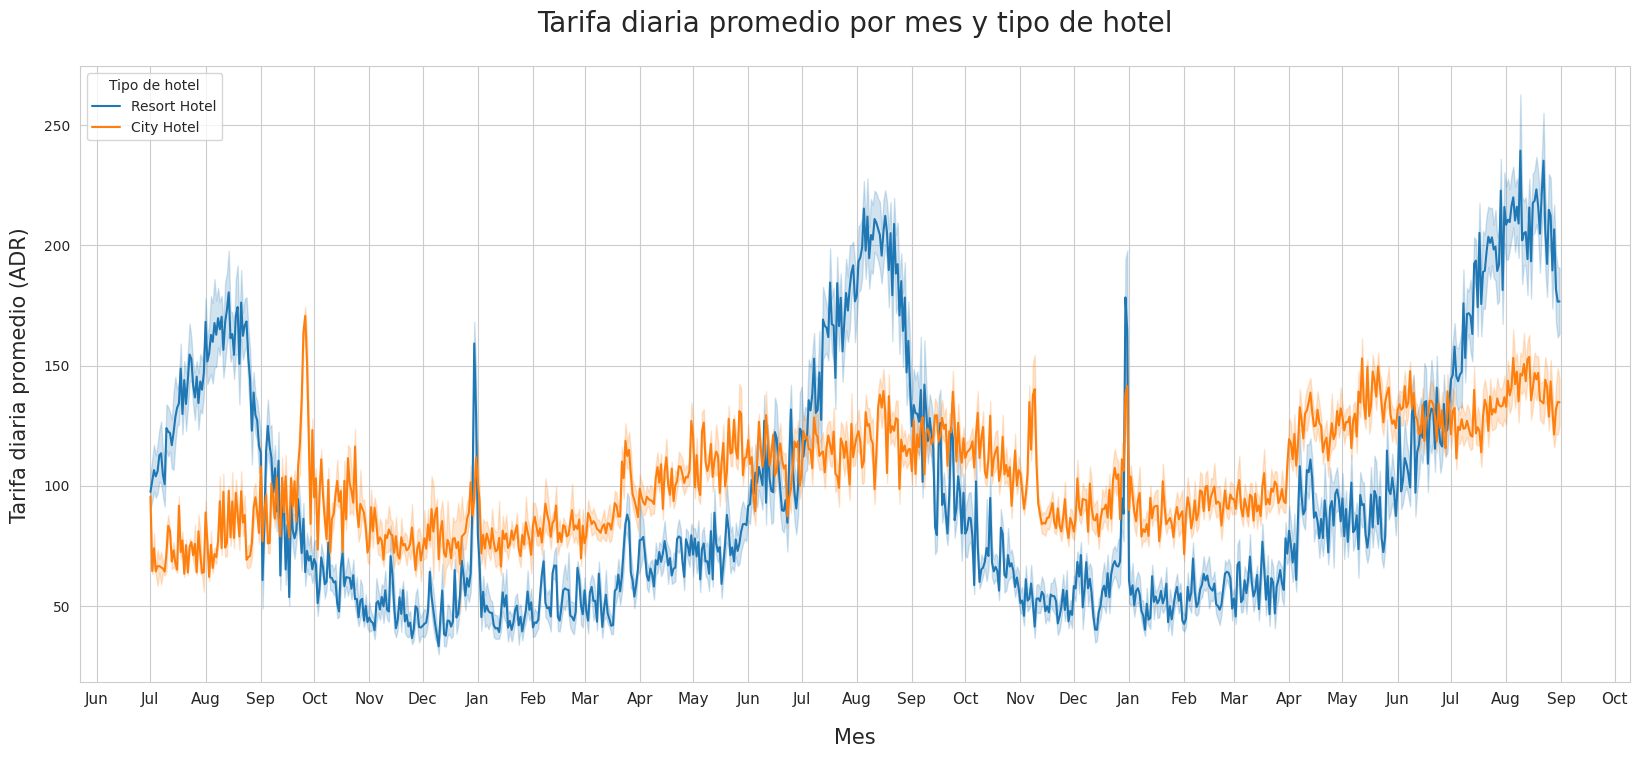

In [55]:
#@title Timeseries para el ADR por tipo de hotel
import matplotlib.dates as mdates

plt.figure(figsize=(20, 8))

sns.lineplot(
    data=df,
    x='arrival_date',
    y='adr',
    hue='hotel',
)

plt.title("Tarifa diaria promedio por mes y tipo de hotel", fontsize=20, pad=25)
plt.xlabel("Mes", fontsize=15, labelpad=15)
plt.ylabel("Tarifa diaria promedio (ADR)", fontsize=15, labelpad=10)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(fontsize=11)
plt.legend(title="Tipo de hotel")

plt.show()

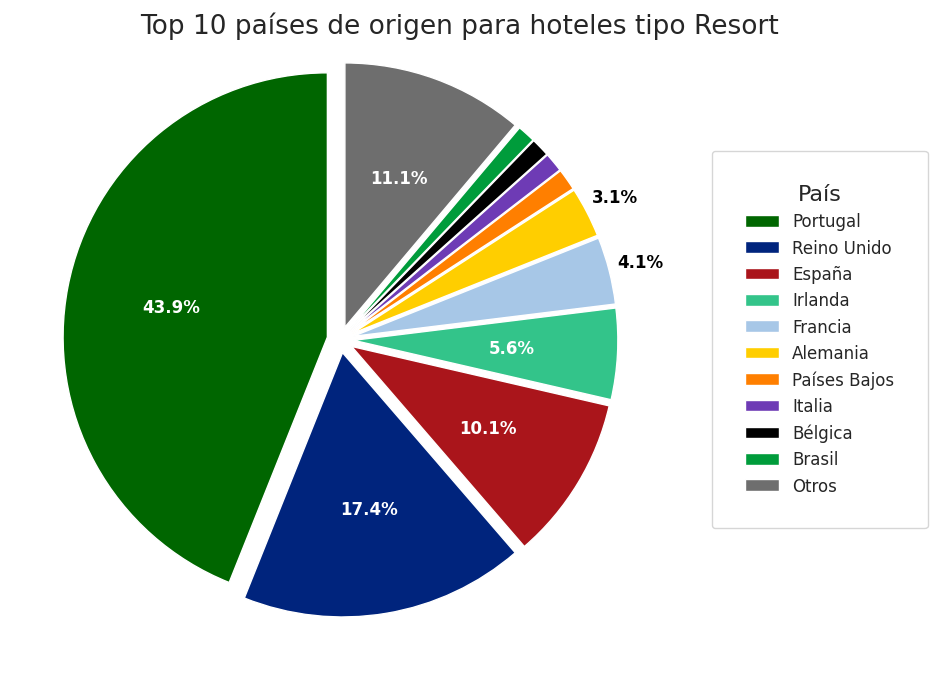

In [56]:
# @title Gráfico de pastel para los 10 principales países de origen para huéspedes de hotel tipo Resort

# Se pasa las abreviaciones a su nombre completo para mostrarlo mejor en la gráfica
abr_to_name = {
    "PRT": "Portugal",
    "GBR": "Reino Unido",
    "FRA": "Francia",
    "ESP": "España",
    "DEU": "Alemania",
    "ITA": "Italia",
    "IRL": "Irlanda",
    "BEL": "Bélgica",
    "BRA": "Brasil",
    "NLD": "Países Bajos"
}

# Código de color para cada país
country_colors = {
    "PRT": "#006600",
    "GBR": "#00247D",
    "FRA": "#A7C7E7",
    "ESP": "#AA151B",
    "DEU": "#FFCE00",
    "ITA": "#6E3BB5",
    "IRL": "#33C48A",
    "BEL": "#000000",
    "BRA": "#009C3B",
    "NLD": "#FF7F00",
    "OTHERS": "#6E6E6E"
}

df_resort = df[df["hotel"] == "Resort Hotel"]
counts = df_resort["country"].value_counts()

top10 = abr_to_name.keys()
top10_counts = counts.loc[top10]

# Hace la suma de los países fuera del top 10
others_count = counts.drop(list(top10)).sum()

sorted_top10 = top10_counts.sort_values(ascending=False)

# Agrupa los demás países como otros
final_counts = sorted_top10.copy()
final_counts["OTHERS"] = others_count

labels_full = [abr_to_name[c] for c in sorted_top10.index] + ["Otros"]
colors = [country_colors[c] for c in sorted_top10.index] + [country_colors["OTHERS"]]

percentages = final_counts / final_counts.sum() * 100

plt.figure(figsize=(12, 7))
explode = [0.05] * len(final_counts)

wedges, texts, autotexts = plt.pie(
    final_counts,
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.6
)

# Mejor visualización para porcentajes
for i, autotext in enumerate(autotexts):
    pct = percentages.iloc[i]
    if pct < 3:
        autotext.set_text("")
    elif pct < 5:
        autotext.set_color("black")
        autotext.set_x(autotext.get_position()[0]*1.8)
        autotext.set_y(autotext.get_position()[1]*1.8)
    else:
        autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")

plt.title(
    "Top 10 países de origen para hoteles tipo Resort",
    fontsize=19,
    pad=30,
    x=0.68,
    y=0.90
)

plt.legend(
    labels_full,
    title="País",
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderpad=2
)

plt.ylabel("")
plt.tight_layout()
plt.show()


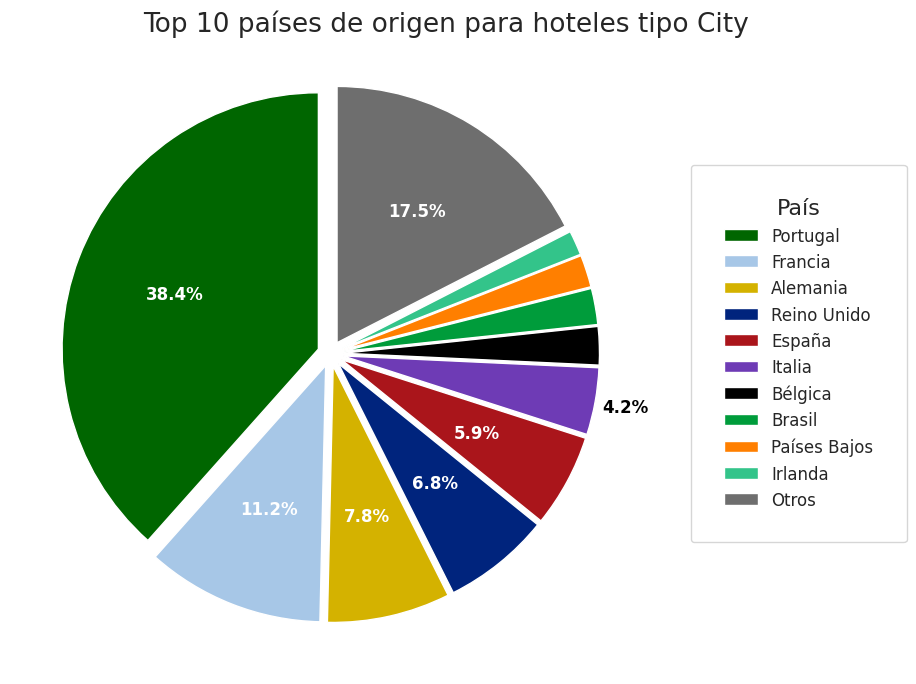

In [57]:
# @title Gráfico de pastel para los 10 principales países de origen para huéspedes de hotel tipo city

# Se pasa las abreviaciones a su nombre completo para mostrarlo mejor en la gráfica
abr_to_name = {
    "PRT": "Portugal",
    "GBR": "Reino Unido",
    "FRA": "Francia",
    "ESP": "España",
    "DEU": "Alemania",
    "ITA": "Italia",
    "IRL": "Irlanda",
    "BEL": "Bélgica",
    "BRA": "Brasil",
    "NLD": "Países Bajos"
}

# Código de color para cada país
country_colors = {
    "PRT": "#006600",
    "GBR": "#00247D",
    "FRA": "#A7C7E7",
    "ESP": "#AA151B",
    "DEU": "#D4B200",
    "ITA": "#6E3BB5",
    "IRL": "#33C48A",
    "BEL": "#000000",
    "BRA": "#009C3B",
    "NLD": "#FF7F00",
    "OTHERS": "#6E6E6E"
}

df_city = df[df["hotel"] == "City Hotel"]
counts = df_city["country"].value_counts()

top10 = abr_to_name.keys()
top10_counts = counts.loc[top10]

# Hace la suma de los países fuera del top 10
others_count = counts.drop(list(top10)).sum()

sorted_top10 = top10_counts.sort_values(ascending=False)

# Agrupa los demás países como otros
final_counts = sorted_top10.copy()
final_counts["OTHERS"] = others_count

labels_full = [abr_to_name[c] for c in sorted_top10.index] + ["Otros"]
colors = [country_colors[c] for c in sorted_top10.index] + [country_colors["OTHERS"]]

percentages = final_counts / final_counts.sum() * 100

plt.figure(figsize=(12, 7))
explode = [0.05] * len(final_counts)

wedges, texts, autotexts = plt.pie(
    final_counts,
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.6
)

# Mejor visualización para porcentajes
for i, autotext in enumerate(autotexts):
    pct = percentages.iloc[i]
    if pct < 3:
        autotext.set_text("")
    elif pct < 5:
        autotext.set_color("black")
        autotext.set_x(autotext.get_position()[0]*1.8)
        autotext.set_y(autotext.get_position()[1]*1.8)
    else:
        autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")

plt.title(
    "Top 10 países de origen para hoteles tipo City",
    fontsize=19,
    pad=25,
    x=0.68,
    y=0.95
)

plt.legend(
    labels_full,
    title="País",
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderpad=2
)

plt.ylabel("")
plt.tight_layout()
plt.show()


# Entrenamiento del modelo

In [58]:
df.shape

(116707, 21)

Estamos usando dummy el cual ya tiene one hot encoding porque las variables categóricas estan como números con get_dummys de pandas (convierte todo a 0,1,2 números para que el modelo lo pueda usar). No usamos one hot encoding de skelearn con el motivo de que queriamos utilizar el acercamiento de dummies visto en la materia.

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  root_mean_squared_error, r2_score

# Rregresamos las variables de fecha a su formato original
df = pd.concat([df, df_dates], axis=1)

df = df.drop(columns=['arrival_date'])

df_for_model = pd.get_dummies(df, drop_first=True, dtype=int)

# Revisamos que este bien
df_for_model



,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
2,7.0,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,13.0,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,14.0,27.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,14.0,27.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
6,0.0,27.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
118762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
118963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
119102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [60]:
print(df_for_model.columns)

# Se revisa que si está hecho bien el one hot encoding

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list',
       ...
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September'],
      dtype='object', length=229)


In [61]:
df_for_model.describe()

# Se revisa que todo estuviera bien sin cosas extrañas que no se hayan filtrado

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
count,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,116707.000000,...,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,105.346929,27.138783,0.937219,2.522034,1.866400,0.101194,0.007694,0.087124,0.119950,2.352421,...,0.056586,0.067385,0.049404,0.106209,0.091902,0.081911,0.099068,0.056788,0.093315,0.088033
std,106.967311,13.558051,0.992280,1.882406,0.473909,0.390811,0.088743,0.851078,1.433721,17.730763,...,0.231051,0.250689,0.216710,0.308106,0.288889,0.274230,0.298755,0.231438,0.290875,0.283345
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,162.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,709.000000,53.000000,16.000000,40.000000,4.000000,3.000000,2.000000,26.000000,72.000000,391.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Cuenta nulos para df_for_model
df_for_model.isnull().sum()

,0
lead_time,2191
arrival_date_week_number,2191
stays_in_weekend_nights,2191
stays_in_week_nights,2191
adults,2191
...,...
arrival_date_month_March,0
arrival_date_month_May,0
arrival_date_month_November,0
arrival_date_month_October,0


In [63]:
# Se suelen generar nan en la transición en el get dummies con Pandas
df_for_model = df_for_model.fillna(0)

In [64]:
# Variables predictoras
X = df_for_model.drop(columns='adr', axis=1)

# Variable objetivo
y = df_for_model['adr']

# Separamos los datos  en 20% de entrenamiento y el 80% para entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)




In [65]:
# Imprime nulos de xtrain y test
print("Nulos en X_train:", X.isnull().sum().sum())
print("Nulos en X_test:", y.isnull().sum().sum())

Nulos en X_train: 0
Nulos en X_test: 0


In [66]:
# Intento con Random Forest
model_random_forest = RandomForestRegressor()

model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest → RMSE: {rmse:.2f} | R2: {r2:.3f}")

Random Forest → RMSE: 14.70 | R2: 0.907


In [67]:
# Comparar train vs test
y_pred_train = model_random_forest.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"TRAIN  RMSE: {rmse_train:.2f} | R2: {r2_train:.3f}")
print(f"TEST   RMSE: {rmse:.2f} | R2: {r2:.3f}")


TRAIN  RMSE: 5.81 | R2: 0.986
TEST   RMSE: 14.70 | R2: 0.907


In [68]:
# Imprime el score de model_random_forest
score = model_random_forest.score(X_test, y_test)
print("Score del modelo inicial")
print(round(score, 2))

Score del modelo inicial
0.91


In [69]:
# Vemos el top 10 de variables mas importantes para que nos de el valor
importances = pd.Series(
    model_random_forest.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)


,0
arrival_date_week_number,0.239159
children,0.129184
hotel_Resort Hotel,0.087290
adults,0.086199
lead_time,0.069803
market_segment_Online TA,0.048219
arrival_date_year,0.041585
meal_HB,0.037527
arrival_date_day_of_month,0.033312
arrival_date_month_August,0.030887


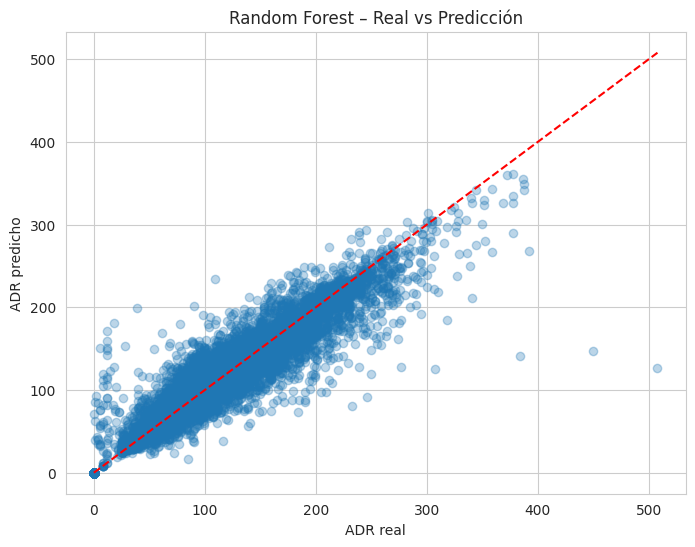

In [70]:
#@title Gráfica valores reales contra predicción
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("ADR real")
plt.ylabel("ADR predicho")
plt.title("Random Forest – Real vs Predicción")
plt.show()


Cabe resaltar que en este caso desarrollamos un modelo de regresión y no de clasificación (como el de cancelaciones). Por lo tanto, aquí no se busca la probabilidad de pertenecer a una categoría, sino que, mediante los datos de entrenamiento, buscamos predecir un valor numérico continuo: el precio medio diario (ADR).

Al analizar los resultados, vemos que el desempeño es bastante sólido. Si bien persisten algunos outliers (por ejemplo, en rangos de 500 con errores grandes, o desplazamientos verticales en 0 y 100 que podrían deberse a descuentos o errores de captura que asumimos como válidos), la gran mayoría de las predicciones se mantienen dentro de un margen de error muy aceptable.

Analizando las métricas R2 y RMSE (enfocándonos en el conjunto de prueba/Test):

RMSE (14.43): Nos indica que el error promedio del modelo es de 14.43 unidades de dinero. Esto es una mejora considerable respecto a los 19 anteriores que se hizo en una prueba anterior.

R2 (0.910): Nos muestra que tenemos un 91% de explicabilidad de los datos en el conjunto de prueba (e incluso un 96.7% en entrenamiento). Esto significa que el modelo es capaz de explicar la inmensa mayoría de la variabilidad del precio.

Es un resultado excelente, considerando que se trata de un modelo base al cual todavía no se le ha aplicado un ajuste fino de hiperparámetros (tuning). Sin embargo, esto también podria indicar overfitting.

In [71]:
# Ahora vamos a tunear el modelo para ver que tanto lo podemos mejorar

# Hiperparametros de klearn para jugar
model_random_forest = RandomForestRegressor(
    n_estimators=400,
    max_depth=30,          # Menos que 40, pero no ridículo
    min_samples_split=5,   # Evita splits con 2 muestras
    min_samples_leaf=2,    # Hojas mínimas
    max_features=0.7,      # No todas las features
    random_state=42,
    n_jobs=-1
)

model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

# Observamos los valores para revisar el modelo con los datos de prueba
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [72]:
# Comparar train vs test
y_pred_train = model_random_forest.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"TRAIN  RMSE: {rmse_train:.2f} | R2: {r2_train:.3f}")
print(f"TEST   RMSE: {rmse:.2f} | R2: {r2:.3f}")


TRAIN  RMSE: 8.72 | R2: 0.967
TEST   RMSE: 14.43 | R2: 0.910


In [73]:
# Imprime el score de model_random_forest
score = model_random_forest.score(X_test, y_test)
print("Score del modelo con ajustes a los hiperparámetros")
print(round(score, 2))

Score del modelo con ajustes a los hiperparámetros
0.91


El objetivo de este ajuste fue evaluar y mejorar la capacidad de generalización del modelo. Al introducir estos parámetros, logramos mitigar el sobreajuste (overfitting), evitando que el modelo simplemente "memorice" los datos de entrenamiento. Si bien el error (RMSE) no disminuyó drásticamente, la relación entre las métricas de entrenamiento y las del conjunto de prueba (el 20% de datos no vistos) indica que el modelo es mejor y confiable ante nuevos datos.

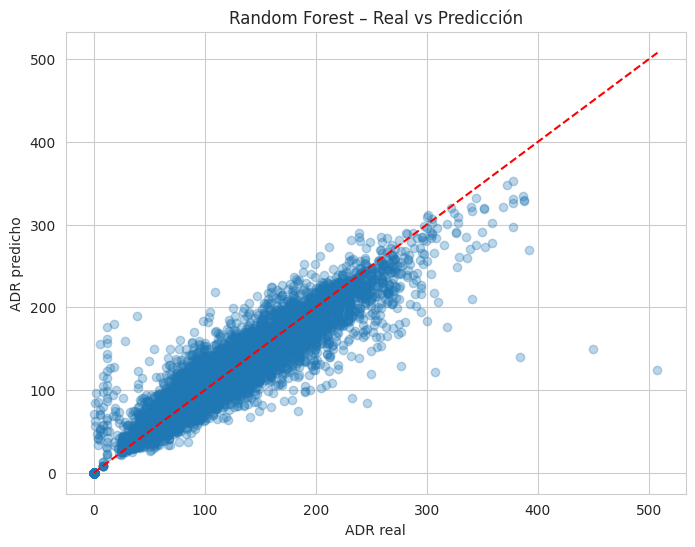

In [74]:
#@title Gráfica valores reales contra predicción con hiperparámetros selccionados
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("ADR real")
plt.ylabel("ADR predicho")
plt.title("Random Forest – Real vs Predicción")
plt.show()

In [75]:
# Vemos el top 10 de variables mas importantes para que nos de el valor
importances = pd.Series(
    model_random_forest.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances


,0
arrival_date_week_number,0.223352
children,0.120128
hotel_Resort Hotel,0.093419
adults,0.092667
lead_time,0.070838
...,...
country_SUR,0.000000
country_SYR,0.000000
country_TGO,0.000000
country_TMP,0.000000


En conclusión, esta versión del modelo demuestra una mejor capacidad de generalización en comparación con los intentos previos. Si bien se ha logrado reducir el sobreajuste (overfitting) , aún persisten ciertos márgenes de error  en las predicciones. Esto sugiere que, aunque las variables actuales explican satisfactoriamente el ADR, el modelo se beneficiaría de enriquecer el dataset con atributos adicionales, como indicadores explícitos de descuentos o promociones estacionales, para contextualizar mejor los valores atípicos. Considerando el tamaño de la muestra (116k registros), este resultado representa el mejor balance obtenido hasta ahora entre precisión y generalización.

Respecto a la importancia de las características, la distribución de los pesos se ve influenciada por el gran número de variables obtenidas que resultó de la codificación de variables categóricas (más de 215 columnas tras el proceso de dummies). A pesar de esta dilución, resulta revelador que variables como la cantidad de niños, el plazo de llegada, el tipo de hotel (Resort) y el número de adultos destaquen como los predictores más influyentes en la determinación del precio.